In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv("Player_Per_Game.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()
df = df.dropna() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33034 entries, 0 to 33033
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         33034 non-null  int64  
 1   lg             33034 non-null  object 
 2   player         33034 non-null  object 
 3   player_id      33034 non-null  object 
 4   age            33014 non-null  float64
 5   team           33034 non-null  object 
 6   pos            31838 non-null  object 
 7   g              33034 non-null  int64  
 8   gs             24856 non-null  float64
 9   mp_per_game    31951 non-null  float64
 10  fg_per_game    33034 non-null  float64
 11  fga_per_game   33034 non-null  float64
 12  fg_percent     32854 non-null  float64
 13  x3p_per_game   26682 non-null  float64
 14  x3pa_per_game  26681 non-null  float64
 15  x3p_percent    22387 non-null  float64
 16  x2p_per_game   26682 non-null  float64
 17  x2pa_per_game  26682 non-null  float64
 18  x2p_pe

In [7]:
y = df['pts_per_game']
feature_cols = [
    'age', 'g', 'gs', 'mp_per_game', 'fg_per_game', 'fga_per_game',
    'fg_percent', 'x3p_per_game', 'x3pa_per_game', 'x3p_percent',
    'x2p_per_game', 'x2pa_per_game', 'x2p_percent', 'ft_per_game',
    'fta_per_game', 'ft_percent', 'orb_per_game', 'drb_per_game',
    'trb_per_game', 'ast_per_game', 'stl_per_game', 'blk_per_game',
    'tov_per_game', 'pf_per_game'
]
X = df[feature_cols]

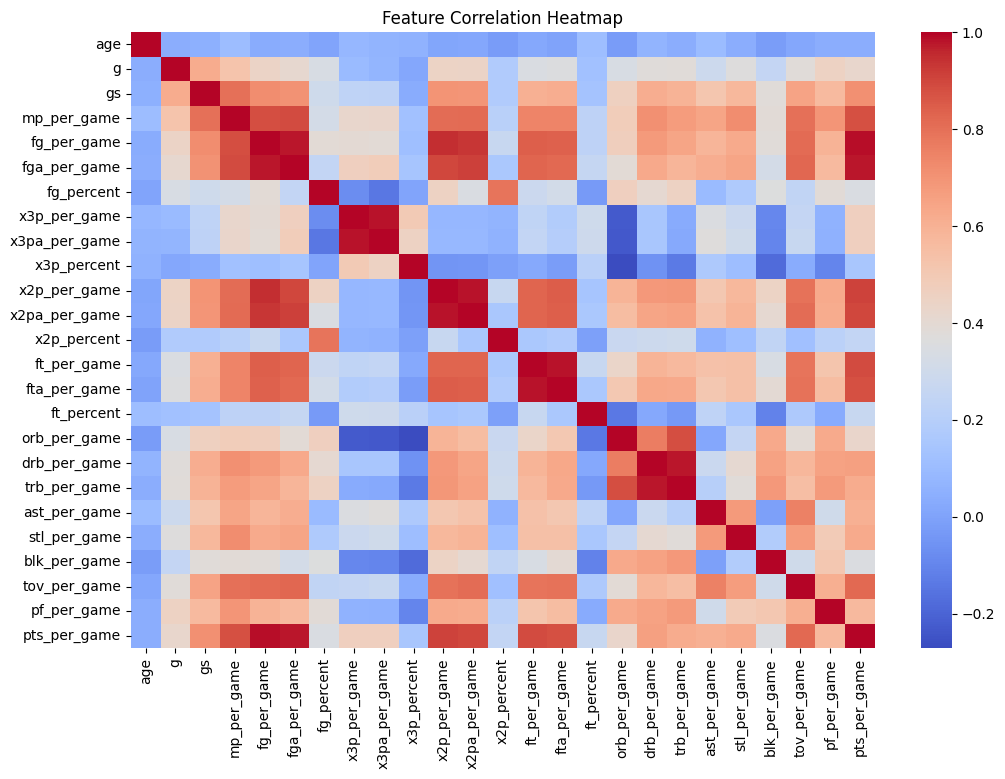

In [8]:
df = df.dropna(subset=feature_cols + ['pts_per_game'])
X = df[feature_cols]
y = df['pts_per_game']
plt.figure(figsize=(12,8))
sns.heatmap(df[feature_cols + ['pts_per_game']].corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
df = df.dropna(subset=['pts_per_game'])
features = [
    'mp_per_game', 'fga_per_game', 'x3pa_per_game', 'fta_per_game',
    'orb_per_game', 'drb_per_game', 'ast_per_game', 'tov_per_game'
]

X = df[features]
y = df['pts_per_game']
X = X.dropna()
y = y.loc[X.index]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.6636165726994879
R² Score: 0.9812070958420844


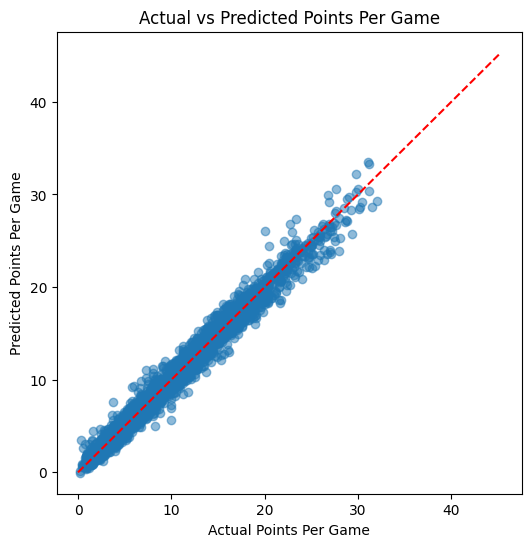

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Points Per Game")
plt.ylabel("Predicted Points Per Game")
plt.title("Actual vs Predicted Points Per Game")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()